In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import gradient, plot_gradient_descent

# Gradient Descent

<!-- Let $f : \R^n \to \R$ be a convex and differentiable function. -->

Suppose that the function $f: \R^n \to \R$ has a global minimum that is attained at $x^* \in \R^n$.

Our goal is to find such $x \in \R^n$ such that for some given $\varepsilon > 0$
$$ f(x) - f(x^*) \le \varepsilon .$$

The error on iteration $t$ is denoted as $\varepsilon_t$ and usually it is considered as
$$ \varepsilon_t = f(x_t) - f(x^*) .$$

## The Gradient Descent Algorithm

We compute the sequence $\{x_t\}, t \in I \subset \N_0$ by following the iterations:
$$ x_{t+1} := x_t - \gamma \nabla f(x^*) , $$
where $\gamma > 0$ is the stepsize.

### Vanilla Analysis

#### First-order characterization of convexity
Given $ x_t, x^* $,
$$
f(x_t) - f(x^*) \leq \nabla f(x_t)^T (x_t - x^*)
$$

Let $ g_t := \nabla f(x_t) $, then by definition of gradient descent:
$$
g_t = \frac{x_t - x_{t+1}}{\gamma}
$$
where $\gamma$ is the step size.

Hence:
$$
g_t^T (x_t - x^*) = \frac{1}{\gamma} (x_t - x_{t+1})^T (x_t - x^*)
$$

Using the basic vector equation and cosine theorem:
$$
\|V\|^2 + \|W\|^2 - 2\langle V, W \rangle = \|V - W\|^2
$$

We get:
$$
g_t^T (x_t - x^*) = \frac{1}{2\gamma} \left( \|x_t - x_{t+1}\|^2 + \|x_t - x^*\|^2 - \|x_{t+1} - x^*\|^2 \right)
$$

Thus:
$$
= \frac{1}{2\gamma} \|g_t\|^2 + \frac{1}{2\gamma} \left( \|x_t - x^*\|^2 - \|x_{t+1} - x^*\|^2 \right)
$$

Taking the sum over all iterations:
$$
\sum_{t=0}^{T-1} g_t^T (x_t - x^*) = \frac{1}{2\gamma} \sum_{t=0}^{T-1} \|g_t\|^2 + \frac{1}{2\gamma} \left( \|x_0 - x^*\|^2 - \|x_T - x^*\|^2 \right)
$$

Recall that:
$$
f(x_t) - f(x^*) \leq g_t^T (x_t - x^*)
$$

Summing up the inequalities:
$$
\sum_{t=0}^{T-1} (f(x_t) - f(x^*)) \leq \frac{1}{2\gamma} \sum_{t=0}^{T-1} \|g_t\|^2 + \frac{1}{2\gamma} \left( \|x_0 - x^*\|^2 - \|x_T - x^*\|^2 \right)
$$

There are a couple of issues that we are facing here. First one is about the squared gradient. Specifically, we cannot control the  value of the squared gradient.
Also there is a dependence on $ \|x_0 - x^*\|^2 $, which literally tells us that the error depends on the initial point more than we would like to.

---


We can overcome some of the issues we've stated above.
Different assumptions show better convergence rate here. We will state some of the results.

## Modifications

### Lipschitz Convex Functions: $O\left(\frac{1}{\epsilon^2}\right)$ steps

#### Theorem 2.1:
Let $ f: \mathbb{R}^n \to \mathbb{R} $ be convex and differentiable, with global minimum at $ x^* \in \mathbb{R}^n $. We suppose that $ \|x_0 - x^*\| \leq R $ and $ \|\nabla f(x_t)\| \leq B \ \forall x \in \mathbb{R}^n $.

If we choose $ \gamma_t = \frac{R}{B\sqrt{T}} $, we will achieve:
$$
\frac{1}{T} \sum_{t=0}^{T-1} \left(f(x_t) - f(x^*)\right) \leq \frac{RB}{\sqrt{T}}.
$$

Thus, to achieve $ \min_{t=0, ..., T-1} (f(x_t) - f(x^*)) \leq \epsilon $, we need:
$$
T \geq \frac{R^2 B^2}{\epsilon^2}.
$$

---

### Smooth Convex Functions: $O\left(\frac{1}{\epsilon}\right)$ steps

#### Def 2.2 (Smooth Function):
Let $ f: \text{dom}(f) \to \mathbb{R} $ be a differentiable function, $ X \subseteq \text{dom}(f) $ convex, and $ L \in \mathbb{R}_+ $. Function $ f $ is called smooth (with parameter $ L $) over $ X $ if:
$$
f(y) \leq f(x) + \nabla f(x)^T (y - x) + \frac{L}{2} \|x - y\|^2 \ \forall x, y \in X.
$$
If $ \text{dom}(f) = X $, $ f $ is simply called smooth.

*TODO: FIGURE*

---

#### Lemma 2.3:
Suppose $ \text{dom}(f) $ is open and convex, and $ f: \text{dom}(f) \to \mathbb{R} $ is differentiable. Let $ L \in \mathbb{R}_+ $. Then the following two statements are equivalent:

1. $ f $ is smooth with parameter $ L $.
2. $ g $ defined by $ g(x) = \frac{L}{2} \|x\|^2 - f(x) $ is convex over $ \text{dom}(g) = \text{dom}(f) $.

---

#### Theorem 2.8:
Let $ f: \mathbb{R}^n \to \mathbb{R} $ be convex and differentiable with global minimum at $ x^* $, and suppose that $ f $ is smooth with parameter $ L $.

Choosing step size $ \gamma_t = \frac{1}{L} $, gradient descent yields:
$$
f(x_T) - f(x^*) \leq \frac{L}{2T} \|x_0 - x^*\|^2, \ T > 0.
$$

Thus, with $ R^2 = \|x_0 - x^*\|^2 $, we need $ T \geq \frac{R^2 L}{2\epsilon} $.

---

### Acceleration for Smooth Convex : $O(\frac{1}{\sqrt{\varepsilon}})$ steps
In 1973, Nemirovski and Yudin showed that in the worst case, every first-order method needs $ O\left(\frac{1}{\sqrt{\epsilon}}\right) $ steps to achieve an additive error of $ \epsilon $ on smooth functions.

In 1983, Nesterov proposed an algorithm known as (Nesterov's) accelerated gradient descent:

1. Choose $ x_0 = z_0 = y_0 $ arbitrarily.
2. For $ t \geq 0 $, set:
$$
y_{t+1} = x_t - \frac{1}{L} \nabla f(x_t),
$$
$$
z_{t+1} = z_t - \frac{t+1}{2L} \nabla f(x_t),
$$
$$
x_{t+1} := \frac{t+1}{t+3} y_{t+1} + \frac{2}{t+3} z_{t+1}.
$$

#### Theorem 2.9:
Let $ f: \mathbb{R}^n \to \mathbb{R} $ be convex and differentiable with global minimum at $ x^* $, and suppose that $ f $ is smooth with parameter $ L $. Accelerated gradient descent yields:
$$
f(x_T) - f(x^*) \leq \frac{2L \|z_0 - x^*\|^2}{T(T+1)}, \ T > 0.
$$

---

### Smooth and Strongly Convex Functions: $O(\log(\frac{1}{\varepsilon}))$ steps

#### Def 2.10 (Strongly Convex Function):
Let $ f: \text{dom}(f) \to \mathbb{R} $ be a convex and differentiable function, $ X \subseteq \text{dom}(f) $ convex, and $ \mu \in \mathbb{R}_+ $, $ \mu > 0 $. Function $ f $ is called strongly convex (with parameter $ \mu $) over $ X $ if:
$$
f(y) \geq f(x) + \nabla f(x)^T (y - x) + \frac{\mu}{2} \|x - y\|^2 \ \forall x, y \in X.
$$
If $ \text{dom}(f) = \text{dom}(X) $, $ f $ is simply called strongly convex.

#### Theorem 2.14:
Let $ f: \mathbb{R}^n \to \mathbb{R} $ be convex and differentiable. Suppose that $ f $ is smooth with parameter $ L $ and strongly convex with parameter $ \mu > 0 $.

Choosing $ \gamma_t = \frac{1}{L} $, gradient descent with arbitrary $ x_0 $ satisfies two properties:

1. $ \|x_{t+1} - x^*\|^2 \leq \left(1 - \frac{\mu}{L}\right) \|x_t - x^*\|^2, \ t \geq 0 $.
2. $ f(x_t) - f(x^*) \leq \frac{L}{2} \left(1 - \frac{\mu}{L}\right)^t \|x_0 - x^*\|^2, \ T > 0 $.

Thus, using the inequality $ \ln(1+x) \leq x $, it follows that:
$$
T \geq \frac{1}{\mu} \ln\left(\frac{R^2 L}{2\epsilon}\right).
$$


In [2]:
def vanilla_gradient_descent(f, x0, stepsize, num_iterations, eps=1e-5):
    """
    Vanilla Gradient Descent with finite difference gradient approximation.
    
    Args:
        f: The function to minimize.
        x0: Initial guess (starting point).
        stepsize: Step size (learning rate).
        num_iterations: Number of iterations.
        eps: Finite difference step size for gradient approximation.
    
    Returns:
        x: The optimized point after the iterations.
        history: List of points during the optimization.
    """
    x = np.array(x0)
    history = [x0]
    
    for _ in range(num_iterations):
        grad = gradient(f, x, eps)
        x = x - stepsize * grad
        history.append(np.copy(x))
    
    return x, history

Optimal point: [3. 2.]


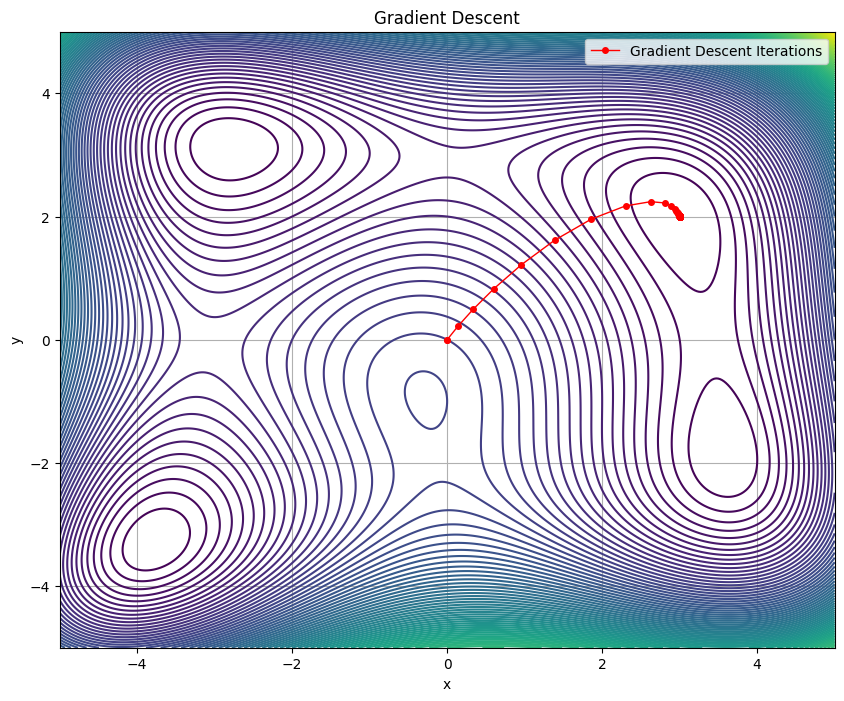

In [3]:
himmelblau = lambda x: (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

x0 = np.array([0, 0])
stepsize = 0.01
num_iterations = 100

x_opt, history = vanilla_gradient_descent(himmelblau, x0, stepsize, num_iterations)
print(f"Optimal point: {x_opt}")

plot_gradient_descent(himmelblau, history, bounds=(-5, 5))

In [4]:
def accelerated_gradient_descent(f, x0, stepsize, num_iterations, epsilon=1e-5):
    """
    Nesterov's Accelerated Gradient Descent with x, y, and z variables as per the correct math.
    
    Args:
        f: The function to minimize.
        grad_f: The gradient of the function.
        x0: Initial guess for x.
        z0: Initial guess for z.
        stepsize: Step size (learning rate).
        num_iterations: Number of iterations.
        epsilon: Finite difference step size for gradient approximation.
    
    Returns:
        x: The optimized point after the iterations.
        history: List of tuples (x, y, z) during the optimization process.
    """
    x = np.array(x0)
    z = np.array(x0)
    y = np.copy(x)
    history = [(np.copy(x), np.copy(y), np.copy(z))]

    for t in range(1, num_iterations + 1):
        grad_x = gradient(f, x, epsilon)
        y = x - stepsize * grad_x
        z = z - (t + 1) / 2 * stepsize * grad_x
        x = (t + 1) / (t + 3) * y + 2 / (t + 3) * z
        history.append((np.copy(x), np.copy(y), np.copy(z)))

    return x, history

Optimal point with accelerated gradient descent: [3.00072526 1.99826563]


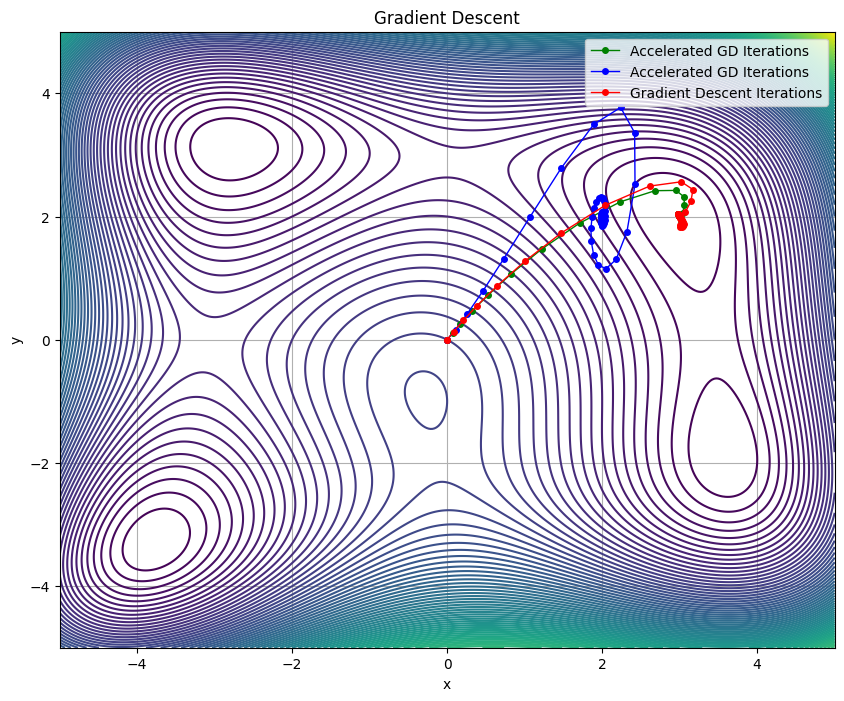

In [6]:
f = lambda x: (x[0] - 3)**2 + (x[1] + 2)**2

himmelblau = lambda x: (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

x0 = np.array([0, 0])
stepsize = 0.005
num_iterations = 50

x_opt, history = accelerated_gradient_descent(himmelblau, x0, stepsize, num_iterations)
print(f"Optimal point with accelerated gradient descent: {x_opt}")

history = np.array(history)
plot_gradient_descent(himmelblau, history[:, 0], history[:, 1:], bounds=(-5, 5))

## Projected and Proximal Gradient Descent

Minimize $ f $ over a closed convex subset $ X \subseteq \mathbb{R}^n $ (we may choose it as we know the region of the minimizer $ x^* \in \mathbb{R}^n $).

Choose arbitrary $ x_0 \in X $ and for $ t \geq 0 $:
$$
y_{t+1} := x_t - \gamma \nabla f(x_t),
$$
$$
x_{t+1} := \Pi_X(y_{t+1}) := \arg\min_{x \in X} \|x - y_{t+1}\|^2.
$$

#### Theorem 3.2:
Let $ f: \text{dom}(f) \to \mathbb{R} $ be convex and differentiable. Let $ X \subseteq \text{dom}(f) $ be closed and convex, and $ x^* $ be the minimizer of $ f $ over $ X $. Suppose that $ \|x_0 - x^*\| \leq R $, and $ \|\nabla f(x_t)\| \leq B \ \forall x \in X $.

By choosing $ \gamma_t = \frac{R}{B\sqrt{T}} $ for projected gradient descent, it yields:
$$
\frac{1}{T} \sum_{t=0}^{T-1} \left( f(x_t) - f(x^*) \right) \leq \frac{RB}{\sqrt{T}}.
$$


### Smooth Convex Functions

#### Theorem 3.4:
Let $ f: \text{dom}(f) \to \mathbb{R} $ be convex and differentiable. Let $ X \subseteq \text{dom}(f) $ be a closed convex set, and assume $ x^* \in X $ to be the minimizer of $ f $. Suppose that $ f $ is smooth over $ X $ with parameter $ L $.

Choosing $ \gamma = \frac{1}{L} $ for projected gradient descent yields for $ x_0 \in X $:
$$
f(x_T) - f(x^*) \leq \frac{L}{2T} \|x_0 - x^*\|^2, \ T > 0.
$$

---

### Smooth and Strongly Convex Functions

#### Theorem 3.5:
Let $ f: \text{dom}(f) \to \mathbb{R} $ be convex and differentiable. Let $ X \subseteq \text{dom}(f) $ be a nonempty closed and convex set, and suppose that $ f $ is smooth over $ X $ with parameter $ L $ and strongly convex over $ X $ with parameter $ \mu > 0 $. $ x^* $ is the minimizer of $ f $ over $ X $.

Choosing $ \gamma_t = \frac{1}{L} $, projected gradient descent with arbitrary $ x_0 \in X $ satisfies:

1. $ \|x_{t+1} - x^*\|^2 \leq (1 - \frac{\mu}{L}) \|x_t - x^*\|^2, \ t \geq 0 $,
2. $ f(x_t) - f(x^*) \leq (1 - \frac{\mu}{L})^{t/2} \|\nabla f(x_0)\|^2 + \frac{L}{2} \left(1 - \frac{\mu}{L}\right)^t \|x_0 - x^*\|^2, \ T > 0 $.

Thus, the iteration complexity is $ O(\log(\frac{1}{\epsilon})) $.

---

### Proximal Gradient Descent (Generalized Gradient Descent)

We focus on $ f(x) = g(x) + h(x) $.

Proximal mapping: $ \text{prox}_{\gamma h}(z) := \arg\min_y \left( \frac{1}{2\gamma} \|y - z\|^2 + h(y) \right) $. Then the iteration of proximal gradient descent is:
$$
x_{t+1} = \text{prox}_{\gamma h} \left( x_t - \gamma \nabla g(x_t) \right).
$$

It can be rewritten as:
$$
x_{t+1} := x_t - \gamma G_t(x_t),
$$
where $ G_t(x_t) := \frac{1}{\gamma} \left( x_t - \text{prox}_{\gamma h}(x_t - \gamma \nabla g(x_t)) \right) $ is the generalized gradient of $ f $.

With $ h $ as an indicator function $ \iota_X(x) = 0 $ for $ x \in X $, and $ +\infty $ otherwise, we may treat PGD as projected gradient descent.

#### Theorem 3.14:
Let $ g: \mathbb{R}^n \to \mathbb{R} $ be convex, smooth with parameter $ L $, and $ h $ convex. Choosing $ \gamma = \frac{1}{L} $, proximal gradient descent with $ x_0 \in X $ satisfies:
$$
f(x_T) - f(x^*) \leq \frac{L}{2T} \|x_0 - x^*\|^2.
$$


## Stochastic Gradient Descent

<!-- Let $ S = \{X_0, \dots, X_d\} $ be a sample. -->
Many objective functions are formulated as:
$$
f(x) = \frac{1}{d} \sum_{i=1}^d f_i(x)
$$
where $ f_i $ is typically the cost function of the $ i $-th data point taken from a training set of defaults.
<!-- We may reformulate it as:
$$
f(x) = \frac{1}{d} \sum_{i=1}^d P(X_i)
$$ -->

### Stochastic Gradient Descent Scheme:
1. Sample $ i \in \{1, \dots, d\} $ uniformly at random.
2. Update rule: 
$$
x_{t+1} = x_t - \gamma_t \nabla f_i(x_t)
$$
where the update vector $ g_t := \nabla f_i(x_t) $ is called a stochastic gradient.

---

### Bounded Stochastic Gradients: $ O\left(\frac{1}{\epsilon^2}\right) $ steps

#### Theorem 5.1:
Let $ f: \mathbb{R}^n \to \mathbb{R} $ be a convex and differentiable function, and let $ x^* $ be a global minimizer of $ f $. Suppose $ \|x_0 - x^*\| \leq R $ and that $ \mathbb{E}[\|g_t\|^2] \leq B^2 $ for all $ t $. Choosing $ \gamma_t = \frac{R}{B\sqrt{T}} $, SGD yields:
$$
\frac{1}{T} \sum_{t=0}^{T-1} \mathbb{E}[f(x_t) - f(x^*)] \leq \frac{RB}{\sqrt{T}}.
$$

---

### Towards Strong Convexity: $ O\left(\frac{1}{\epsilon}\right) $ steps

#### Theorem 5.2:
Let $ f: \mathbb{R}^n \to \mathbb{R} $ be differentiable and strongly convex with the parameter $ \mu > 0 $, and let $ x^* $ be the unique global minimizer of $ f $. With a decreasing step size $ \gamma_t = \frac{2}{\mu(t + 1)} $, SGD yields:
$$
\mathbb{E}\left[ f\left( \frac{1}{T} \sum_{t=1}^{T} x_t \right) - f(x^*) \right] \leq \frac{2B^2}{\mu T}.
$$
where $ B = \max_{t \geq 1} \mathbb{E}[\|g_t\|] $.

---

### Mini-batch Variants

Set:
$$
\tilde{g}_t := \frac{1}{m} \sum_{j=1}^m g_t^j
$$
to compute the gradient $ \tilde{g}_t $, where:
$$
g_t^j = \nabla f_{i_j}(x_t)
$$
for $ i_j \in I_m \subseteq \{1, \dots, d\} $ as distinct $ i_j $'s, and $ m $ is called the mini-batch size (i.e., $ |I_m| = m $).

For larger sizes of mini-batch, we get closer to the true gradient:
$$
\mathbb{E}[\|\tilde{g}_t - \nabla f(x_t)\|^2] \leq \frac{B^2}{m}.
$$


# Gradient Flows: TODO